In [ ]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Q-learning in the wild (3 pts)

Here we use the qlearning agent on taxi env from openai gym.
You will need to insert a few agent functions here.

In [2]:
import random, math
import numpy as np
from collections import defaultdict

class QLearningAgent():
  def __init__(self, alpha, epsilon, discount, getLegalActions):
    self.getLegalActions = getLegalActions
    self._qValues = defaultdict(lambda: defaultdict(lambda: 0))
    self.alpha = alpha
    self.epsilon = epsilon
    self.discount = discount

  def getQValue(self, state, action):
    if not (state in self._qValues) or not (action in self._qValues[state]):
        return 0.0
    return self._qValues[state][action]

  def setQValue(self, state, action, value):
    self._qValues[state][action] = value

  def _compute_state_value(self, current_state):
    permitted_actions = self.getLegalActions(current_state)
    
    if not permitted_actions:
        return 0.0
    
    action_values = [self.getQValue(current_state, act) for act in permitted_actions]
    return max(action_values)

  def _select_best_policy(self, current_state):
    permitted_actions = self.getLegalActions(current_state)

    if not permitted_actions:
        return None
    
    max_utility = float('-inf')
    optimal_actions = []
    
    for act in permitted_actions:
        utility_score = self.getQValue(current_state, act)
        if utility_score > max_utility:
            max_utility = utility_score
            optimal_actions = [act]
        elif utility_score == max_utility:
            optimal_actions.append(act)
    
    return random.choice(optimal_actions)

  def _choose_action_with_exploration(self, current_state):
    permitted_actions = self.getLegalActions(current_state)

    if not permitted_actions:
        return None

    if random.random() < self.epsilon:
        return random.choice(permitted_actions)
    else:
        return self._select_best_policy(current_state)

  def _update_q_table(self, previous_state, performed_action, next_state, received_reward):
    discount_factor = self.discount
    learning_coefficient = self.alpha

    current_estimate = self.getQValue(previous_state, performed_action)
    future_value = self._compute_state_value(next_state)
    updated_estimate = current_estimate + learning_coefficient * (received_reward + discount_factor * future_value - current_estimate)
    
    self.setQValue(previous_state, performed_action, updated_estimate)

  # Сохраняем оригинальные имена методов для совместимости
  getValue = _compute_state_value
  getPolicy = _select_best_policy
  getAction = _choose_action_with_exploration
  update = _update_q_table

In [ ]:
import gym
env = gym.make("Taxi-v3")
n_actions = env.action_space.n

In [4]:
# Ячейка 1: Установка
!pip install gym

# Ячейка 2: Основной код
%load_ext autoreload
%autoreload 2
import numpy as np
np.bool8 = np.bool_
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

import random, math
import numpy as np
from collections import defaultdict
import gym

env = gym.make("Taxi-v3")
action_space_size = env.action_space.n

# ... остальной код ...

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/721.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/721.7 kB ? eta -:--:--
     ---------------------------------------- 721.7/721.7 kB 3.0 MB/s  0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827741 sha256=03418874f5616c4773b0a565acdcecf4bc168321a224f95d7fff6db83e551eda
  Stored in directory: c:\users\lobod\appdata\local\packages\pythonsoftwarefoundation.python.3.13_qbz5n2kfra8p0\localcache\local\pip\cache\wheels\1d\34\c6\856a1e1eff47d8f18545c833b6138ae1e9f53c7de9bcc5f31d
Successfully bu


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\lobod\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


Достигните положительной награды, постройте график

In [ ]:
from IPython.display import clear_output


Итерация 4500, Epsilon: 0.1053
Средний результат (последние 100): 2.54
Рекорд: 15.00


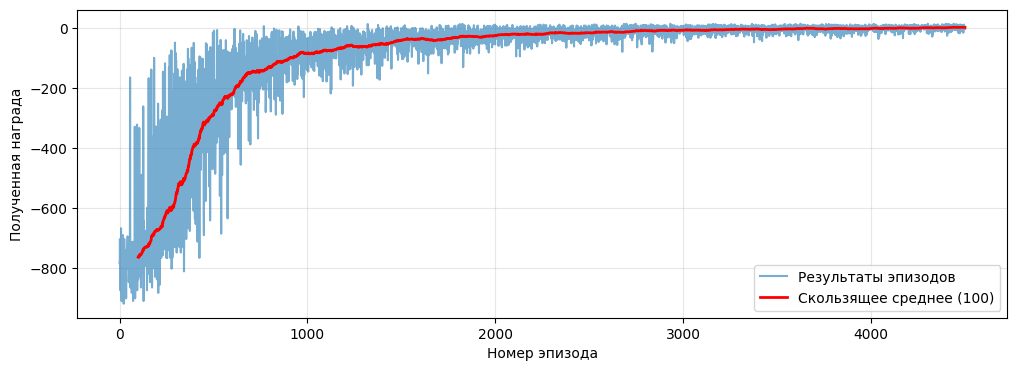


Результаты тестирования (100 эпизодов):
Среднее значение: 5.25
Максимум: 14.00
Минимум: -13.00


In [6]:
import sys
!{sys.executable} -m pip install gym

import numpy as np
np.bool8 = np.bool_
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

import random, math
from collections import defaultdict
import gym

# Создание среды
environment = gym.make("Taxi-v3")
available_actions = environment.action_space.n

class QLearningAgent():
  def __init__(self, alpha, epsilon, discount, getLegalActions):
    self.getLegalActions = getLegalActions
    self._qValues = defaultdict(lambda: defaultdict(lambda: 0))
    self.alpha = alpha
    self.epsilon = epsilon
    self.discount = discount

  def getQValue(self, state, action):
    if not (state in self._qValues) or not (action in self._qValues[state]):
        return 0.0
    return self._qValues[state][action]

  def setQValue(self, state, action, value):
    self._qValues[state][action] = value

  def _compute_state_value(self, current_state):
    permitted_actions = self.getLegalActions(current_state)
    
    if not permitted_actions:
        return 0.0
    
    action_values = [self.getQValue(current_state, act) for act in permitted_actions]
    return max(action_values)

  def _select_best_policy(self, current_state):
    permitted_actions = self.getLegalActions(current_state)

    if not permitted_actions:
        return None
    
    max_utility = float('-inf')
    optimal_actions = []
    
    for act in permitted_actions:
        utility_score = self.getQValue(current_state, act)
        if utility_score > max_utility:
            max_utility = utility_score
            optimal_actions = [act]
        elif utility_score == max_utility:
            optimal_actions.append(act)
    
    return random.choice(optimal_actions)

  def _choose_action_with_exploration(self, current_state):
    permitted_actions = self.getLegalActions(current_state)

    if not permitted_actions:
        return None

    if random.random() < self.epsilon:
        return random.choice(permitted_actions)
    else:
        return self._select_best_policy(current_state)

  def _update_q_table(self, previous_state, performed_action, next_state, received_reward):
    discount_factor = self.discount
    learning_coefficient = self.alpha

    current_estimate = self.getQValue(previous_state, performed_action)
    future_value = self._compute_state_value(next_state)
    updated_estimate = current_estimate + learning_coefficient * (received_reward + discount_factor * future_value - current_estimate)
    
    self.setQValue(previous_state, performed_action, updated_estimate)

  getValue = _compute_state_value
  getPolicy = _select_best_policy
  getAction = _choose_action_with_exploration
  update = _update_q_table

def execute_episode(env, learner, max_steps=10000):
    accumulated_score = 0
    initial_observation = env.reset()
    current_position = initial_observation[0] if isinstance(initial_observation, tuple) else initial_observation
    
    for step_index in range(max_steps):
        chosen_action = learner.getAction(current_position)
        step_outcome = env.step(chosen_action)
        
        if len(step_outcome) == 4:
            next_position, step_reward, is_completed, _ = step_outcome
        else:
            next_position, step_reward, terminated_flag, truncated_flag, _ = step_outcome
            is_completed = bool(terminated_flag) or bool(truncated_flag)
        
        if isinstance(next_position, tuple):
            next_position = next_position[0]
        
        learner.update(current_position, chosen_action, next_position, step_reward)
        current_position = next_position
        accumulated_score += step_reward
        
        if is_completed:
            break
    
    return accumulated_score

# Инициализация агента
rl_agent = QLearningAgent(
    alpha=0.5, 
    epsilon=1.0, 
    discount=0.99,
    getLegalActions=lambda state: range(available_actions)
)

# Обучение агента
score_history = []
peak_performance = float('-inf')

for episode_idx in range(5000):
    episode_score = execute_episode(environment, rl_agent)
    score_history.append(episode_score)
    
    rl_agent.epsilon = max(0.05, rl_agent.epsilon * 0.9995)
    
    if episode_score > peak_performance:
        peak_performance = episode_score
    
    if episode_idx % 500 == 0:
        clear_output(wait=True)
        recent_avg = np.mean(score_history[-100:]) if len(score_history) >= 100 else np.mean(score_history)
        print(f"Итерация {episode_idx}, Epsilon: {rl_agent.epsilon:.4f}")
        print(f"Средний результат (последние 100): {recent_avg:.2f}")
        print(f"Рекорд: {peak_performance:.2f}")
        
        plt.figure(figsize=(12, 4))
        plt.plot(score_history, alpha=0.6, label='Результаты эпизодов')
        
        if len(score_history) >= 100:
            moving_average = np.convolve(score_history, np.ones(100)/100, mode='valid')
            plt.plot(range(99, len(score_history)), moving_average, 'r-', linewidth=2, label='Скользящее среднее (100)')
        
        plt.xlabel('Номер эпизода')
        plt.ylabel('Полученная награда')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

# Создание агента для тестирования
evaluation_agent = QLearningAgent(
    alpha=0.5, 
    epsilon=0.05, 
    discount=0.99,
    getLegalActions=lambda state: range(available_actions)
)
evaluation_agent._qValues = rl_agent._qValues.copy()

# Тестирование
evaluation_scores = []
for test_trial in range(100):
    evaluation_scores.append(execute_episode(environment, evaluation_agent))

print(f"\nРезультаты тестирования (100 эпизодов):")
print(f"Среднее значение: {np.mean(evaluation_scores):.2f}")
print(f"Максимум: {np.max(evaluation_scores):.2f}")
print(f"Минимум: {np.min(evaluation_scores):.2f}")

## 3. Continuous state space (2 pt)

Чтобы использовать табличный q-learning на continuous состояниях, надо как-то их обрабатывать и бинаризовать. Придумайте способ разбивки на дискретные состояния.

In [8]:
import gym

# Создание среды CartPole
training_env = gym.make("CartPole-v0")
action_count = training_env.action_space.n

# Получение и отображение первого состояния
initial_observation = training_env.reset()
if isinstance(initial_observation, tuple):
    current_state = initial_observation[0]
    print(f"начальное состояние: {current_state}")
else:
    print(f"начальное состояние: {initial_observation}")

# Сбор состояний среды
state_collection = []
for iteration in range(100):
    reset_outcome = training_env.reset()
    if isinstance(reset_outcome, tuple):
        agent_state = reset_outcome[0]
    else:
        agent_state = reset_outcome
    
    episode_completed = False
    while not episode_completed:
        state_collection.append(agent_state)
        random_action = training_env.action_space.sample()
        step_result = training_env.step(random_action)
        
        if len(step_result) == 4:
            agent_state, step_reward, episode_completed, _ = step_result
        else:
            agent_state, step_reward, terminated_flag, truncated_flag, _ = step_result
            episode_completed = terminated_flag or truncated_flag
        
        if isinstance(agent_state, tuple):
            agent_state = agent_state[0]

# Преобразование в массив и вывод статистики
state_collection = np.array(state_collection)
print(f"Собрано {len(state_collection)} состояний")
print(f"Размерность состояний: {state_collection.shape}")
print(f"Диапазон значений: [{state_collection.min():.2f}, {state_collection.max():.2f}]")

начальное состояние: [-0.02355878 -0.01294405 -0.01561147  0.00873338]
Собрано 2286 состояний
Размерность состояний: (2286, 4)
Диапазон значений: [-2.72, 2.48]


### Play a few games

Постройте распределения различных частей состояния игры. Сыграйте несколько игр и запишите все состояния.

## Binarize environment

начальное состояние: [-0.01830784  0.04881411 -0.04376638  0.01546302]
Собрано 2261 состояний
Форма данных: (2261, 4)


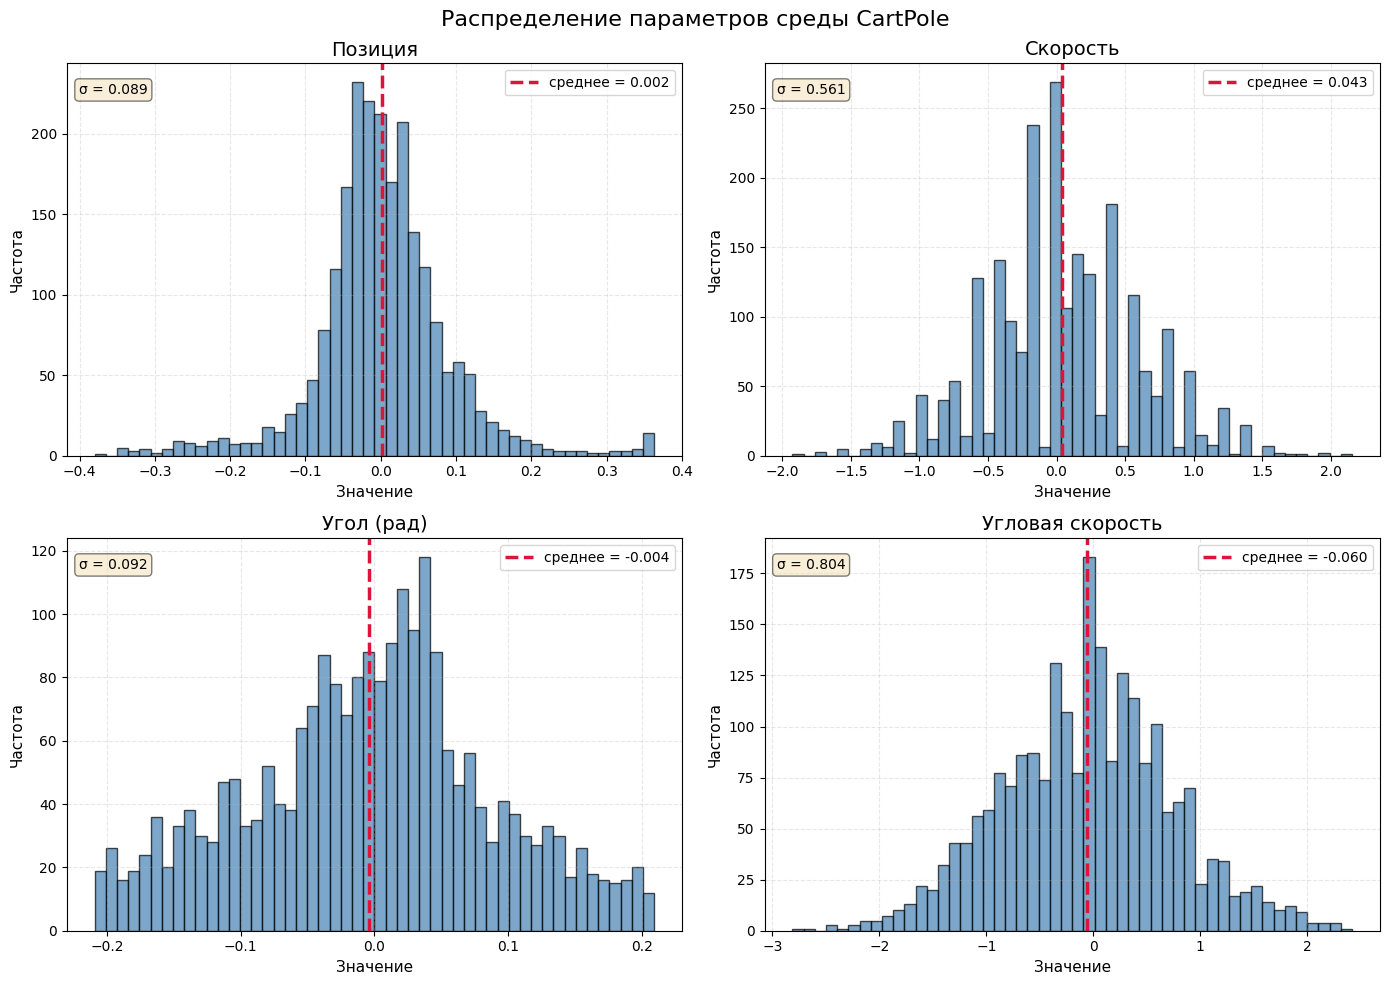


Статистика по состояниям:
Позиция: мин=-0.380, макс=0.363, сред=0.002
Скорость: мин=-1.926, макс=2.155, сред=0.043
Угол (рад): мин=-0.209, макс=0.209, сред=-0.004
Угловая скорость: мин=-2.813, макс=2.418, сред=-0.060


In [10]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Класс Binarizer для дискретизации состояний
class Binarizer:
    def __init__(self, env):
        self.env = env
        
    def reset(self):
        return self.env.reset()
    
    def step(self, action):
        return self.env.step(action)
    
    @property
    def action_space(self):
        return self.env.action_space

# Создание бинаризованной среды
base_env = gym.make("CartPole-v0")
cartpole_env = Binarizer(base_env)
available_actions = cartpole_env.action_space.n

# Получение первого состояния
initial_state = cartpole_env.reset()
if isinstance(initial_state, tuple):
    current_position = initial_state[0]
    print(f"начальное состояние: {current_position}")
else:
    print(f"начальное состояние: {initial_state}")

# Сбор состояний
state_samples = []
for episode in range(100):
    reset_outcome = cartpole_env.reset()
    if isinstance(reset_outcome, tuple):
        agent_state = reset_outcome[0]
    else:
        agent_state = reset_outcome
    
    episode_finished = False
    while not episode_finished:
        state_samples.append(agent_state)
        random_move = cartpole_env.action_space.sample()
        step_result = cartpole_env.step(random_move)
        
        if len(step_result) == 4:
            agent_state, step_reward, episode_finished, _ = step_result
        else:
            agent_state, step_reward, terminated, truncated, _ = step_result
            episode_finished = terminated or truncated
        
        if isinstance(agent_state, tuple):
            agent_state = agent_state[0]

# Преобразование в массив
state_samples = np.array(state_samples)
print(f"Собрано {len(state_samples)} состояний")
print(f"Форма данных: {state_samples.shape}")

# Визуализация распределений
figure, axis_grid = plt.subplots(2, 2, figsize=(14, 10))
parameter_names = ['Позиция', 'Скорость', 'Угол (рад)', 'Угловая скорость']

for index, current_axis in enumerate(axis_grid.flat):
    parameter_data = state_samples[:, index]
    
    current_axis.hist(parameter_data, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    current_axis.set_title(parameter_names[index], fontsize=14)
    current_axis.set_xlabel('Значение', fontsize=11)
    current_axis.set_ylabel('Частота', fontsize=11)
    current_axis.grid(True, alpha=0.3, linestyle='--')
    
    mean_value = np.mean(parameter_data)
    std_value = np.std(parameter_data)
    
    current_axis.axvline(mean_value, color='crimson', linestyle='--', 
                         linewidth=2.5, label=f'среднее = {mean_value:.3f}')
    current_axis.legend(loc='upper right', fontsize=10)
    
    current_axis.text(0.02, 0.95, f'σ = {std_value:.3f}', 
                     transform=current_axis.transAxes, 
                     fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('Распределение параметров среды CartPole', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

print("\nСтатистика по состояниям:")
for idx, name in enumerate(parameter_names):
    print(f"{name}: мин={state_samples[:, idx].min():.3f}, "
          f"макс={state_samples[:, idx].max():.3f}, "
          f"сред={state_samples[:, idx].mean():.3f}")

## Learn

Эпизод: 999900
Epsilon: 0.0000
Средняя награда (последние 100): 9.36


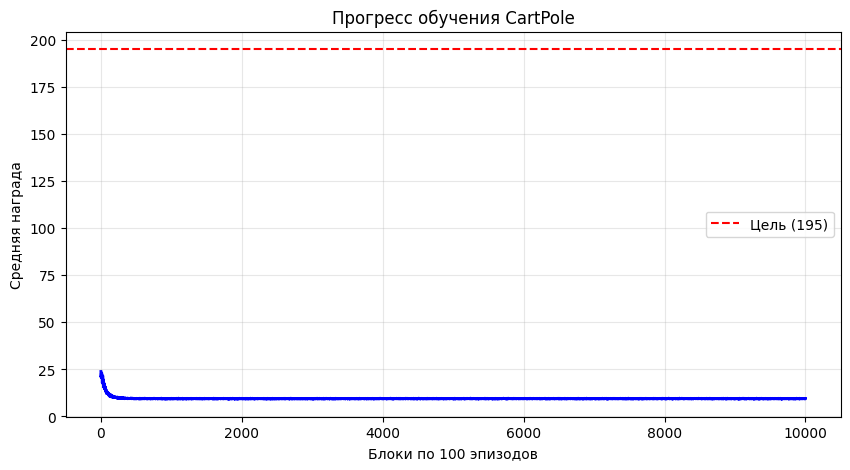

In [20]:
!pip install gym -q

import gym, numpy as np, matplotlib.pyplot as plt, random
from collections import defaultdict
from IPython.display import clear_output

class QLearningAgent:
    def __init__(self, alpha, epsilon, discount, getLegalActions):
        self.alpha = alpha
        self.epsilon = epsilon
        self.discount = discount
        self.getLegalActions = getLegalActions
        self._qValues = defaultdict(lambda: defaultdict(float))
    
    def _hash_state(self, s):
        return tuple(s) if isinstance(s, np.ndarray) else s
    
    def getQValue(self, s, a):
        s = self._hash_state(s)
        return self._qValues[s][a]
    
    def setQValue(self, s, a, v):
        s = self._hash_state(s)
        self._qValues[s][a] = v
    
    def getValue(self, s):
        acts = self.getLegalActions(s)
        if not acts: return 0.0
        return max(self.getQValue(s, a) for a in acts)
    
    def getPolicy(self, s):
        acts = self.getLegalActions(s)
        if not acts: return None
        best = max([(self.getQValue(s, a), a) for a in acts])[1]
        return best
    
    def getAction(self, s):
        acts = self.getLegalActions(s)
        if not acts: return None
        if random.random() < self.epsilon:
            return random.choice(acts)
        return self.getPolicy(s)
    
    def update(self, s, a, ns, r):
        self.setQValue(s, a, self.getQValue(s, a) + self.alpha * 
                      (r + self.discount * self.getValue(ns) - self.getQValue(s, a)))

class Binarizer:
    def __init__(self, env): self.env = env
    def reset(self): return self.env.reset()
    def step(self, a): return self.env.step(a)
    @property
    def action_space(self): return self.env.action_space

env = Binarizer(gym.make("CartPole-v0"))
n_actions = env.action_space.n

def play_and_train(env, agent, T=10**4):
    total = 0
    s = env.reset()
    if isinstance(s, tuple): s = s[0]
    for _ in range(T):
        a = agent.getAction(s)
        out = env.step(a)
        if len(out) == 4: s2, r, done, _ = out
        else: s2, r, done, _, _ = out
        if isinstance(s2, tuple): s2 = s2[0]
        agent.update(s, a, s2, r)
        s = s2; total += r
        if done: break
    return total

agent = QLearningAgent(alpha=0.1, epsilon=1.0, discount=0.99,
    getLegalActions=lambda s: range(n_actions))

rewards = []
rewBuf = []
ma = -1000000000000

for i in range(10000):
    for j in range(100):
        episode_reward = play_and_train(env, agent)
        rewards.append(episode_reward)
    
    agent.epsilon *= 0.99
    
    current_avg = np.mean(rewards[-100:])
    rewBuf.append(current_avg)
    
    clear_output(True)
    print(f"Эпизод: {i*100}")
    print(f"Epsilon: {agent.epsilon:.4f}")
    print(f"Средняя награда (последние 100): {current_avg:.2f}")
    
    plt.figure(figsize=(10, 5))
    plt.plot(rewBuf, 'b-', linewidth=2)
    plt.xlabel('Блоки по 100 эпизодов')
    plt.ylabel('Средняя награда')
    plt.title('Прогресс обучения CartPole')
    plt.axhline(y=195, color='r', linestyle='--', label='Цель (195)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()
    
    if current_avg > 195:
        print("🎉 Победа!")
        break

## 4. Experience replay (5 pts)

In [15]:
import random
from collections import deque

class ExperienceBuffer:
    def __init__(self, capacity):
        self.memory = []
        self.capacity = capacity
        self.position = 0

    def __len__(self):
        return len(self.memory)

    def store(self, state, action, reward, next_state, terminal):
        entry = (state, action, reward, next_state, terminal)
        
        if self.position >= len(self.memory):
            self.memory.append(entry)
        else:
            self.memory[self.position] = entry
        
        self.position = (self.position + 1) % self.capacity

    def fetch(self, batch_size):
        if batch_size > len(self.memory):
            batch_size = len(self.memory)
        
        selected = random.sample(range(len(self.memory)), batch_size)
        
        states_batch = []
        actions_batch = []
        rewards_batch = []
        next_states_batch = []
        terminals_batch = []
        
        for idx in selected:
            experience = self.memory[idx]
            states_batch.append(experience[0])
            actions_batch.append(experience[1])
            rewards_batch.append(experience[2])
            next_states_batch.append(experience[3])
            terminals_batch.append(experience[4])
        
        return states_batch, actions_batch, rewards_batch, next_states_batch, terminals_batch

Some tests to make sure your buffer works right

In [ ]:
import numpy as np

# Используем измененный класс
replay = ExperienceBuffer(2)

# Тестовые данные
obj1 = tuple(range(5))
obj2 = tuple(range(5, 10))

# Добавление первого объекта
replay.store(*obj1)

# Проверка извлечения
states, actions, rewards, next_states, terminals = replay.fetch(1)
assert states[0] == obj1[0], "Если в буфере один объект, он должен извлекаться"

# Добавление второго объекта
replay.store(*obj2)
assert len(replay.memory) == 2, "Убедитесь, что метод __len__ работает корректно"

# Попытка добавить еще один объект (должен заменить)
replay.store(*obj2)
assert len(replay.memory) == 2, "При максимальной емкости заменяйте объекты, а не добавляйте новые"

# Проверка сэмплирования большего количества
states, actions, rewards, next_states, terminals = replay.fetch(100)
assert len(set(states)) == 1

# Добавление первого объекта обратно
replay.store(*obj1)
states, actions, rewards, next_states, terminals = replay.fetch(100)
assert len(set(states)) == 2

# Еще одно добавление первого объекта
replay.store(*obj1)
states, actions, rewards, next_states, terminals = replay.fetch(100)
assert len(set(states)) == 1

print("Успех! 🎉")

Now let's use this buffer to improve training:

In [18]:
import gym
import random
from collections import defaultdict
import numpy as np

# Определение класса ReplayBuffer
class ReplayBuffer:
    def __init__(self, size):
        self._storage = []
        self._maxsize = size
        self._next_idx = 0

    def __len__(self):
        return len(self._storage)

    def add(self, obs_t, action, reward, obs_tp1, done):
        data = (obs_t, action, reward, obs_tp1, done)
        
        if self._next_idx >= len(self._storage):
            self._storage.append(data)
        else:
            self._storage[self._next_idx] = data
        
        self._next_idx = (self._next_idx + 1) % self._maxsize

    def sample(self, batch_size):
        if batch_size > len(self._storage):
            batch_size = len(self._storage)
        
        indices = random.sample(range(len(self._storage)), batch_size)
        
        states, actions, rewards, next_states, dones = [], [], [], [], []
        
        for idx in indices:
            data = self._storage[idx]
            states.append(data[0])
            actions.append(data[1])
            rewards.append(data[2])
            next_states.append(data[3])
            dones.append(data[4])
        
        return states, actions, rewards, next_states, dones

# Класс Binarizer
class Binarizer:
    def __init__(self, env): 
        self.env = env
    def reset(self): 
        return self.env.reset()
    def step(self, a): 
        return self.env.step(a)
    @property
    def action_space(self): 
        return self.env.action_space

# Класс QLearningAgent
class QLearningAgent:
    def __init__(self, alpha, epsilon, discount, getLegalActions):
        self.alpha = alpha
        self.epsilon = epsilon
        self.discount = discount
        self.getLegalActions = getLegalActions
        self._qValues = defaultdict(lambda: defaultdict(float))
    
    def _hash_state(self, s):
        return tuple(s) if isinstance(s, np.ndarray) else s
    
    def getQValue(self, s, a):
        s = self._hash_state(s)
        return self._qValues[s][a]
    
    def setQValue(self, s, a, v):
        s = self._hash_state(s)
        self._qValues[s][a] = v
    
    def getValue(self, s):
        acts = self.getLegalActions(s)
        if not acts: return 0.0
        return max(self.getQValue(s, a) for a in acts)
    
    def getPolicy(self, s):
        acts = self.getLegalActions(s)
        if not acts: return None
        best = max([(self.getQValue(s, a), a) for a in acts])[1]
        return best
    
    def getAction(self, s):
        acts = self.getLegalActions(s)
        if not acts: return None
        if random.random() < self.epsilon:
            return random.choice(acts)
        return self.getPolicy(s)
    
    def update(self, s, a, ns, r):
        self.setQValue(s, a, self.getQValue(s, a) + self.alpha * 
                      (r + self.discount * self.getValue(ns) - self.getQValue(s, a)))

# Инициализация
env = Binarizer(gym.make('CartPole-v0'))
n_actions = env.action_space.n

agent = QLearningAgent(alpha=0.5, epsilon=1.0, discount=0.99,
                       getLegalActions=lambda s: range(n_actions))

replay = ReplayBuffer(10000)

def play_and_train(env, agent, t_max=10**4, batch_size=10):
    total_reward = 0.0
    s = env.reset()

    for t in range(t_max):
        action = agent.getAction(s)
        next_s, r, done, _ = env.step(action)
        
        replay.add(s, action, r, next_s, done)
        
        s = next_s
        total_reward += r
        if done: break

    if len(replay) >= batch_size:
        states, actions, rewards, next_states, dones = replay.sample(batch_size)
        for i in range(batch_size):
            agent.update(states[i], actions[i], next_states[i], rewards[i])

    return total_reward

def train_with_replay(env, agent, replay, t_max=10000, batch_size=64, updates_per_step=4):
    total_reward = 0.0
    
    reset_result = env.reset()
    s = reset_result[0] if isinstance(reset_result, tuple) else reset_result
    
    for t in range(t_max):
        a = agent.getAction(s)
        
        step_result = env.step(a)
        if len(step_result) == 4:
            next_s, r, done, _ = step_result
        else:
            next_s, r, terminated, truncated, _ = step_result
            done = bool(terminated) or bool(truncated)
        
        if isinstance(next_s, tuple):
            next_s = next_s[0]
        
        replay.add(s, a, r, next_s, done)
        s = next_s
        total_reward += r
        
        if len(replay) >= batch_size:
            for _ in range(updates_per_step):
                states, actions, rewards, next_states, dones = replay.sample(batch_size)
                
                for i in range(batch_size):
                    if dones[i]:
                        target = rewards[i]
                    else:
                        target = rewards[i] + agent.discount * agent.getValue(next_states[i])
                    
                    current_q = agent.getQValue(states[i], actions[i])
                    new_q = current_q + agent.alpha * (target - current_q)
                    agent.setQValue(states[i], actions[i], new_q)
        
        if done:
            break
    
    return total_reward

Train with experience replay

Epsilon: 0.0500
Средняя: 9.76
Размер буфера: 50000/50000


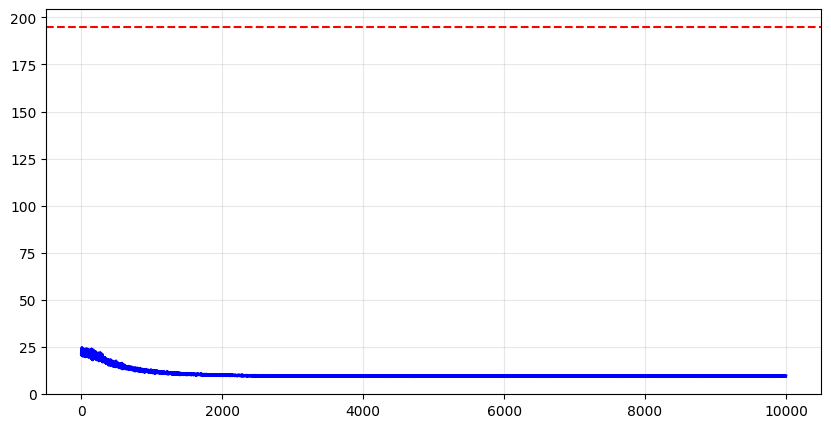

In [23]:
import gym
env = Binarizer(gym.make('CartPole-v0'))
n_actions = env.action_space.n

agent = QLearningAgent(alpha=0.5, epsilon=1.0, discount=0.99,
                       getLegalActions=lambda s: range(n_actions))

replay = ReplayBuffer(50000)

print("Заполняем буфер...")
for _ in range(10000):
    reset_result = env.reset()
    s = reset_result[0] if isinstance(reset_result, tuple) else reset_result
    done = False
    while not done:
        a = env.action_space.sample()
        step_result = env.step(a)
        if len(step_result) == 4:
            next_s, r, done, _ = step_result
        else:
            next_s, r, terminated, truncated, _ = step_result
            done = bool(terminated) or bool(truncated)
        if isinstance(next_s, tuple):
            next_s = next_s[0]
        replay.add(s, a, r, next_s, done)
        s = next_s
print("Готово!")

# Определяем функцию обучения с буфером
def train_episode(env, agent, replay, batch_size=64, updates_per_step=4):
    total_reward = 0.0
    reset_result = env.reset()
    s = reset_result[0] if isinstance(reset_result, tuple) else reset_result
    
    for t in range(10000):
        a = agent.getAction(s)
        step_result = env.step(a)
        if len(step_result) == 4:
            next_s, r, done, _ = step_result
        else:
            next_s, r, terminated, truncated, _ = step_result
            done = bool(terminated) or bool(truncated)
        if isinstance(next_s, tuple):
            next_s = next_s[0]
        
        replay.add(s, a, r, next_s, done)
        s = next_s
        total_reward += r
        
        if len(replay) >= batch_size:
            for _ in range(updates_per_step):
                states, actions, rewards, next_states, dones = replay.sample(batch_size)
                for i in range(batch_size):
                    if dones[i]:
                        target = rewards[i]
                    else:
                        target = rewards[i] + agent.discount * agent.getValue(next_states[i])
                    current_q = agent.getQValue(states[i], actions[i])
                    new_q = current_q + agent.alpha * (target - current_q)
                    agent.setQValue(states[i], actions[i], new_q)
        
        if done:
            break
    
    return total_reward

rewards = []
rewBuf = []
ma = -1000000000000

for i in range(10000):
    for j in range(100):
        episode_reward = train_episode(env, agent, replay, batch_size=64, updates_per_step=4)
        rewards.append(episode_reward)
    
    agent.epsilon = max(0.05, agent.epsilon * 0.999)
    
    current_avg = np.mean(rewards[-100:])
    rewBuf.append(current_avg)
    
    clear_output(True)
    print(f"Epsilon: {agent.epsilon:.4f}")
    print(f"Средняя: {current_avg:.2f}")
    print(f"Размер буфера: {len(replay)}/{replay._maxsize}")
    
    plt.figure(figsize=(10,5))
    plt.plot(rewBuf, 'b-', linewidth=2)
    plt.axhline(y=195, color='r', linestyle='--')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    if current_avg > 195:
        print("Win!")
        break